作業1：使用 LSTM 模型預測股票未來價格，自訂窗口大小（20天），並分析預測效果。

輸入20天收盤價，預測隔一天收盤價

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
import yfinance as yf

code = "1301.TW"

data = yf.download(code, start="2020-01-01", end="2024-10-30")
data.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']


[*********************100%***********************]  1 of 1 completed


In [368]:
data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,80.077484,99.599998,100.0,99.300003,100.000000,3326184
2020-01-03 00:00:00+00:00,81.605080,101.500000,101.5,99.300003,99.599998,5636265
2020-01-06 00:00:00+00:00,82.007057,102.000000,102.0,101.000000,101.500000,6514815
2020-01-07 00:00:00+00:00,81.605080,101.500000,102.0,101.000000,101.500000,6945442
2020-01-08 00:00:00+00:00,80.399086,100.000000,101.5,100.000000,101.500000,4643180


In [369]:
data.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-10-23 00:00:00+00:00,46.200001,46.200001,47.150002,46.200001,46.750000,9599022
2024-10-24 00:00:00+00:00,46.200001,46.200001,46.849998,45.799999,46.299999,11764545
2024-10-25 00:00:00+00:00,46.849998,46.849998,47.000000,46.299999,46.299999,7670729
2024-10-28 00:00:00+00:00,48.549999,48.549999,48.900002,46.700001,47.000000,17189394
2024-10-29 00:00:00+00:00,47.700001,47.700001,48.650002,47.150002,48.450001,11856501


In [370]:
data.shape


(1171, 6)

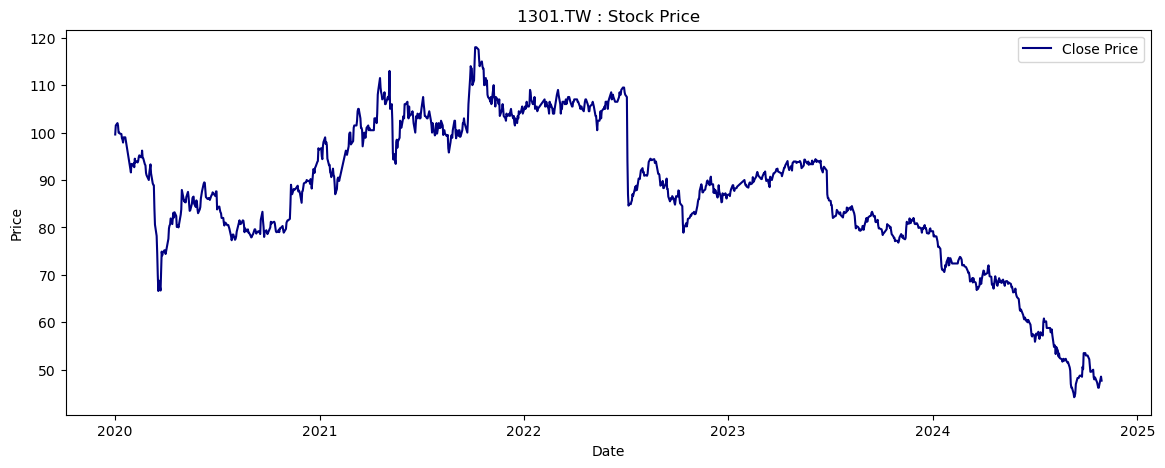

In [371]:
# 查看data視覺化
plt.figure(figsize=(14, 5))
plt.plot(data['Close'], label='Close Price',color="navy")
plt.ylabel('Price')
plt.xlabel('Date')
plt.title(f'{code} : Stock Price')
plt.legend()
plt.show()


In [372]:

close_data = data['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
close_data_scaled = scaler.fit_transform(close_data.reshape(-1, 1))
print(close_data_scaled)

[[0.75067748]
 [0.77642276]
 [0.78319783]
 ...
 [0.03590783]
 [0.05894307]
 [0.04742547]]


In [373]:
def create_dataset(dataset, time_step=20):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

window_size = 20
X, y = create_dataset(close_data_scaled, window_size)


In [374]:
print(X.shape, y.shape)

(1150, 20, 1) (1150, 1)


In [375]:
# 構建LSTM模型

model = Sequential()
# 第一層 ＬSTM
model.add(LSTM(units=100, return_sequences=True, input_shape=(window_size, 1)))
model.add(Dropout(0.2))


# 第二層 LSTM
model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

# 第三層 : 全連接層
model.add(Dense(units=1))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [380]:
print(X.shape)
print(y.shape)


(1150, 20, 1)
(1150, 1)


In [376]:
# 訓練模型
model.fit(X, y, epochs=100, batch_size=16, validation_split=0.1)

# 預測
predicted_prices = model.predict(X)

print(predicted_prices)

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0605 - val_loss: 0.0085
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0040 - val_loss: 0.0024
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0039 - val_loss: 0.0012
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029 - val_loss: 8.1325e-04
Epoch 12/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/

In [377]:
predicted_prices_re = scaler.inverse_transform(predicted_prices.reshape(-1, 1)).flatten()
print(predicted_prices_re.shape)
print(X.shape)

# 將預測價格加入datetime_index, 為 data 往右移 window_size 天
predicted_prices_re = pd.Series(predicted_prices_re, index=data.index[window_size+1:])
print(predicted_prices_re)


(1150,)
(1150, 20, 1)
Date
2020-02-11 00:00:00+00:00    93.447083
2020-02-12 00:00:00+00:00    93.443680
2020-02-13 00:00:00+00:00    93.204910
2020-02-14 00:00:00+00:00    93.392609
2020-02-17 00:00:00+00:00    94.142258
                               ...    
2024-10-23 00:00:00+00:00    47.068775
2024-10-24 00:00:00+00:00    46.427147
2024-10-25 00:00:00+00:00    45.786983
2024-10-28 00:00:00+00:00    45.472919
2024-10-29 00:00:00+00:00    45.763634
Length: 1150, dtype: float32


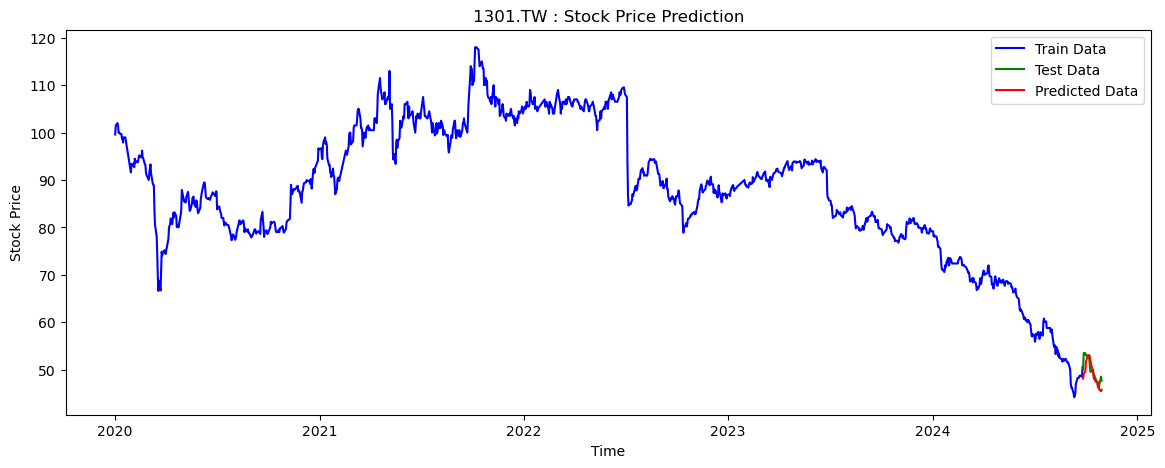

In [378]:
# 繪製圖表
plt.figure(figsize=(14, 5))
plt.plot(data['Close'][:-data.shape[0] + X.shape[0]], color='b', label='Train Data') 
plt.plot(data['Close'][-data.shape[0] + X.shape[0]:], color='g', label='Test Data')
plt.plot(predicted_prices_re[-data.shape[0] + X.shape[0]:], color='r', label='Predicted Data')
plt.title(f'{code} : Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()